# 结构动力学 刘金波


## 欧拉梁

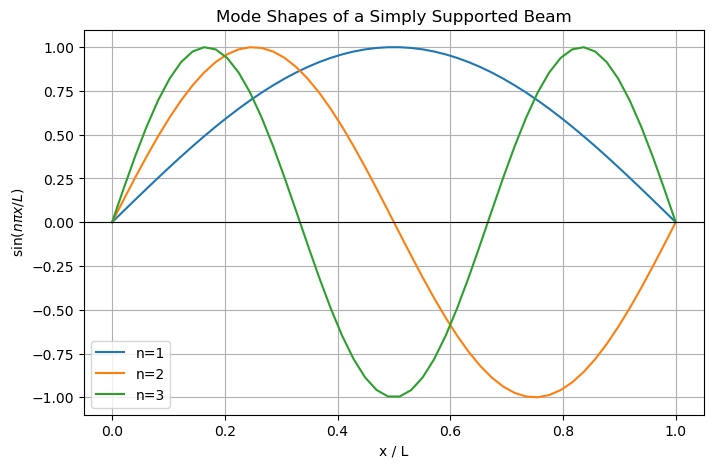

In [1]:
# 6-1 
import numpy as np
import matplotlib.pyplot as plt
# 参数设置
L = 1.0 # 梁长
# np.linspace(start, stop, num)是NumPy中的函数，用来生成等间距的数值序列。
x = np.linspace(0,L,50) # 空间坐标
modes = [1,2,3] # 需要绘制的振型阶数

plt.figure(figsize=(8,5))
for n in modes:
    y = np.sin(n*np.pi*x/L)
    plt.plot(x,y,label=f"n={n}")

# 图像格式
plt.title("Mode Shapes of a Simply Supported Beam")
plt.xlabel("x / L")
plt.ylabel(r"$\sin(n \pi x / L)$")
plt.axhline(0,color='black',linewidth=0.8)# 水平参考线
plt.legend()# 显示图曲线label
plt.grid(True)
plt.show()

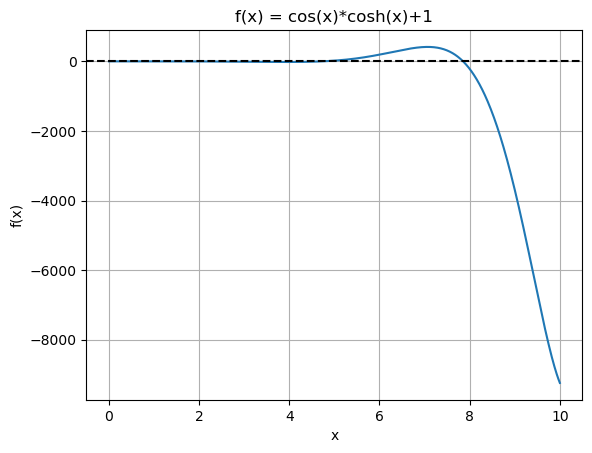

In [2]:
# 6-2
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: np.cos(x)*np.cosh(x)+1
x = np.linspace(0,10,1000)
y = f(x)

plt.plot(x,y,label='f(x)')
plt.axhline(0,color='k',linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('f(x) = cos(x)*cosh(x)+1')
plt.grid(True)
plt.show()

In [3]:
import numpy as np
from math import sqrt
from math import pi
# def f(a): return np.cos(a)*np.cosh(a) + 1.0
# def df(a): return -np.sin(a)*np.cosh(a) + np.cos(a)*np.sinh(a) # 导数
# 下面算出来的函数是sin(aL),这里把aL等价于a，外面的a多乘了L，所以要除L=18.4
def f(a):return  10/(1.9753863*18.4)*a*(np.cos(a)*np.sinh(a)-np.sin(a)*np.cosh(a))+np.cos(a)*np.cosh(a) +1


# 二分法
def bisection(f:callable,a,b,tol=1e-12,maxiter=200):
    """
    callable,表明可调用对象，可省略，写上是为了清晰
    f 函数参数
    tol 收敛精度
    maxiter 最大迭代次数
    """
    fa,fb = f(a),f(b)
    if fa*fb > 0: 
        raise ValueError("no sign change")
    for _ in range(maxiter):
        m = (a+b)/2
        fm = f(m)
        if (b-a)/2 < tol: # 区间长度已经足够小
            return m
        if abs(fm) < tol: # 函数值足够接近0
            return m
        # 缩小区间
        if fa*fm <= 0:
            b,fb = m,fm
        else:
            a,fa = m,fm
# 牛顿法快速迭代
def newton_refine(x0,f:callable,df:callable,tol=1e-14,maxiter=50):
    x = x0
    for _ in range(maxiter):
        fx = f(x)
        dfx = df(x)
        if abs(fx) < tol:
            return x
        if dfx == 0:
            break
        x -= fx/dfx
    return x
    
# 找前n个正根的函数
def find_roots(n=3,x_max=50,step=1e-3):
    """ 
    x_max: 搜索的最大值即区间[0,x_max]
    setp: 扫描步长，越小越精细
    """
    xs = np.arange(1e-6,x_max,step)
    # 每个点的函数值的数组
    vals = f(xs)
    # 零点列表
    roots = [] 
    for i in range(len(xs)-1):
        if vals[i]*vals[i+1] < 0:
            a,b = xs[i],xs[i+1]
            r_bis = bisection(f,a,b,tol=1e-12)
            # r =newton_refine(r_bis,f,df)
            # if not any(abs(r-rr)<1e-9 for rr in roots):
            roots.append(r_bis)
            if len(roots) >= n:
                break
    return roots

def frequency(e,i,m,l,r):
    return r**2*sqrt(e*i/(m*l**4))/(2*pi)

e = 2.06E+11
# 实心截面
# i = pi/64*2.7**4
# m = pi/4*2.7**2*7850
#圆管截面
i = pi/64*(2.7**4-2.64**4)
m = 7850*pi/4*(2.7**2-2.64**2)
l = 18.4
print(m)
roots = find_roots(3)
for _,r in enumerate(roots,1):
    print(frequency(e,i,m,l,r))
    # print(r)

1975.3863366874596
5.492138649557493
40.24990402929535
120.03809676248046


In [150]:
from sympy import Matrix,det,symbols,sin,cos,sinh,cosh,diff,Eq,solve,simplify,expand,pprint
from sympy import latex,lambdify,factor,symbols
# 定义符号  M 端部质量，m 分布质量
a,x,L,E,I,w,M,J,m = symbols('a x L E I w M J m',nonzero=True)
A,B,C,D = symbols('A B C D')
# 定义Q(x)和各阶导
Q = A*sin(a*x) + B*cos(a*x) + C*sinh(a*x) + D*cosh(a*x)
Q1 = diff(Q,x)
Q2 = diff(Q,x,2)
Q3 = diff(Q,x,3)
# 定义边界条件
# 在x = 0
bc1 = Eq(Q.subs(x,0),0)
bc2 = Eq(Q1.subs(x,0),0)

# 解A,B
sol = solve([bc1,bc2],(A,B))
# 在x=L
bc3 = Eq(E*I*Q3.subs(x,L),-w**2*Q.subs(x,L)*M)
bc3 = bc3.subs(sol)
# bc4 = Eq(E*I*Q2.subs(x,L),-w**2*Q1.subs(x,L)*J)
bc4 = Eq(E*I*Q2.subs(x,L),0)
bc4 = bc4.subs(sol)
f1 = expand(bc3.lhs-bc3.rhs)
f2 = expand(bc4.lhs-bc4.rhs)
f1_c = f1.coeff(C)
f1_d = f1.coeff(D)
f2_c = f2.coeff(C)
f2_d = f2.coeff(D)
M_c = Matrix([
    [f1_c,f1_d],
    [f2_c,f2_d],
])
det = M_c.det()
# w替换掉
det_w = det.subs(w*w,E*I*a**4/m)
det_w = factor(det_w)
det_w_f = simplify(det_w)
display(sol,bc3,bc4,f1,f2,f1_c,f1_d,f2_c,f2_d,M_c,det_w,det_w_f)

{A: -C, B: -D}

Eq(E*I*a**3*(C*cos(L*a) + C*cosh(L*a) - D*sin(L*a) + D*sinh(L*a)), -M*w**2*(-C*sin(L*a) + C*sinh(L*a) - D*cos(L*a) + D*cosh(L*a)))

Eq(E*I*a**2*(C*sin(L*a) + C*sinh(L*a) + D*cos(L*a) + D*cosh(L*a)), 0)

C*E*I*a**3*cos(L*a) + C*E*I*a**3*cosh(L*a) - C*M*w**2*sin(L*a) + C*M*w**2*sinh(L*a) - D*E*I*a**3*sin(L*a) + D*E*I*a**3*sinh(L*a) - D*M*w**2*cos(L*a) + D*M*w**2*cosh(L*a)

C*E*I*a**2*sin(L*a) + C*E*I*a**2*sinh(L*a) + D*E*I*a**2*cos(L*a) + D*E*I*a**2*cosh(L*a)

E*I*a**3*cos(L*a) + E*I*a**3*cosh(L*a) - M*w**2*sin(L*a) + M*w**2*sinh(L*a)

-E*I*a**3*sin(L*a) + E*I*a**3*sinh(L*a) - M*w**2*cos(L*a) + M*w**2*cosh(L*a)

E*I*a**2*sin(L*a) + E*I*a**2*sinh(L*a)

E*I*a**2*cos(L*a) + E*I*a**2*cosh(L*a)

Matrix([
[E*I*a**3*cos(L*a) + E*I*a**3*cosh(L*a) - M*w**2*sin(L*a) + M*w**2*sinh(L*a), -E*I*a**3*sin(L*a) + E*I*a**3*sinh(L*a) - M*w**2*cos(L*a) + M*w**2*cosh(L*a)],
[                                     E*I*a**2*sin(L*a) + E*I*a**2*sinh(L*a),                                       E*I*a**2*cos(L*a) + E*I*a**2*cosh(L*a)]])

E**2*I**2*a**5*(-2*M*a*sin(L*a)*cosh(L*a) + 2*M*a*cos(L*a)*sinh(L*a) + m*sin(L*a)**2 + m*cos(L*a)**2 + 2*m*cos(L*a)*cosh(L*a) - m*sinh(L*a)**2 + m*cosh(L*a)**2)/m

2*E**2*I**2*a**5*(-M*a*sin(L*a)*cosh(L*a) + M*a*cos(L*a)*sinh(L*a) + m*cos(L*a)*cosh(L*a) + m)/m

In [151]:
det_w_f_1 = det_w_f/(2*E**2*I**2*a**5)
det_w_f_1

(-M*a*sin(L*a)*cosh(L*a) + M*a*cos(L*a)*sinh(L*a) + m*cos(L*a)*cosh(L*a) + m)/m

In [ ]:
import sympy
sympy.sqrt(8)

In [9]:
from sympy import symbols,expand,factor
x,y = symbols('x y')
expr = x + 2*y
expr

x + 2*y

In [3]:
expr+1

x + 2*y + 1

In [4]:
expr -1

x + 2*y - 1

In [5]:
expr -x

2*y

In [7]:
x*expr

x*(x + 2*y)

In [12]:
expand_pr = expand(x*expr)
expand_pr

x**2 + 2*x*y

In [13]:
factor(expand_pr)

x*(x + 2*y)

In [1]:
10/(1.9753863*18.4)

0.2751250531957042